In [345]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage

In [346]:
alice_image = plt.imread(r'C:\Users\Гриша\Desktop\Алиса.png')

In [348]:
def make_image(image):
    return Image.fromarray(skimage.img_as_ubyte(image))

In [354]:
def add_padding(img,n,m):
    return np.pad(img, ((n,n),(m,m),(0,0)), 'mean')

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


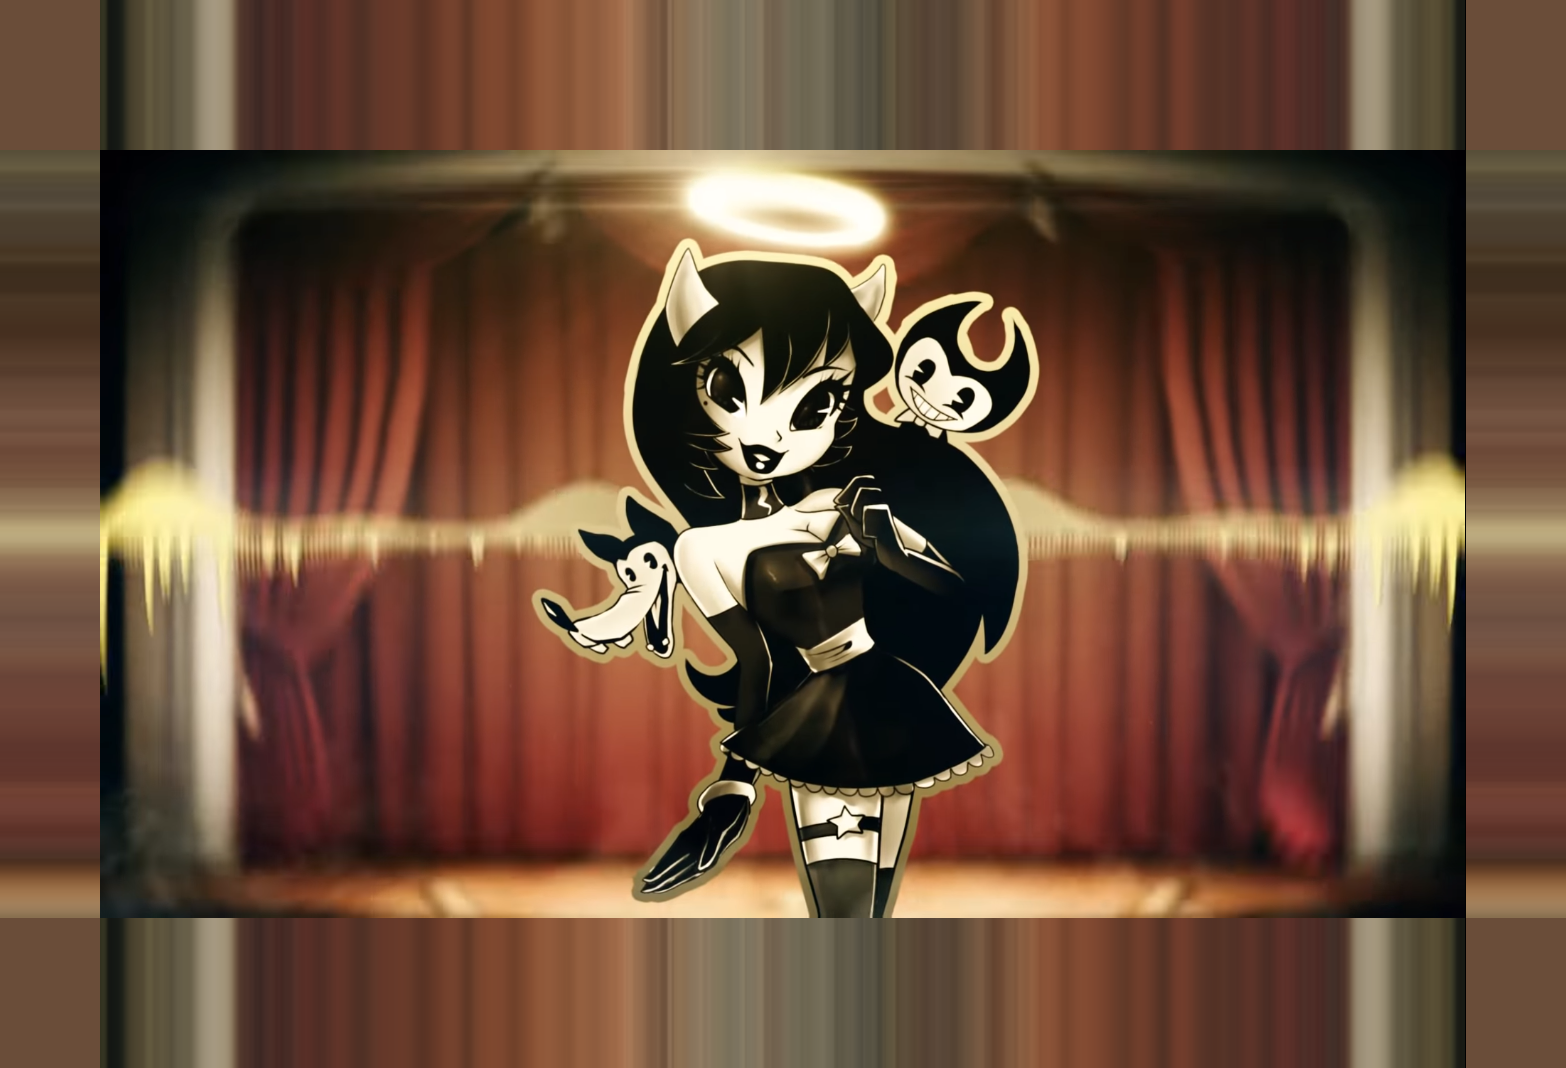

In [381]:
make_image(add_padding(alice_image,150,100))

In [356]:
def gauss_matrix(q,n):
    matr = np.ones((n,n))
    conv = []
    for i in range(0,n):
        for j in range(0,n):
            l = (n-1)/2-(n-1) + i
            k = (n-1)/2-(n-1) + j
            conv.append(matr[i,j]/((2*np.pi*q)**0.5)*np.exp(-(l**2+k**2)/(2*q**2)))
    return np.array(conv).reshape(n,n)

In [357]:
def box_matrix(n):
    return np.ones((n,n))/n

In [359]:
def apply_conv(img, conv_matr, norm = True):
    h = conv_matr.shape[0]
    if h%2 == 0: 
        n = int(h/2)
        m = n-1
        print('paddings:', n,m)
    else:
        n = int((h-1)/2)
        m = n
        print('paddings:', n,m)
    pad_img = np.pad(img, ((n,m),(n,m),(0,0)), 'mean')
    new_img = np.zeros(img.shape)
    for ch in range(0,3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):            
                new_img[i,j,ch] = np.sum(pad_img[i:i+h, j:j+h, ch]*conv_matr)
    if norm:
        div = new_img.max()/img.max()            
        return new_img/div
    else:
        return new_img

In [358]:
def median_filter(img, h):
    if h%2 == 0: 
        n = int(h/2)
        m = n-1
        print('paddings:', n,m)
    else:
        n = int((h-1)/2)
        m = n
        print('paddings:', n,m)
    pad_img = np.pad(img, ((n,m),(n,m),(0,0)), 'mean')
    new_img = np.zeros(img.shape)
    for ch in range(0,3):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):            
                new_img[i,j,ch] = np.median(pad_img[i:i+h, j:j+h, ch])          
    return new_img

In [373]:
def contour_filter(img, f_type, multichennel = False):  
    #matrix
    filters = {'sobel':np.array([[-1,-2,-1],[0,0,0],[1,2,1]]),
               'previtt':np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),
               'roberts':np.array([[-1,0],[0,1]])}
    if f_type == 'roberts':
        h, n, m = 2, 1, 1
    else:
        h, n, m = 3, 2, 2
    pad_img = np.pad(img, ((n,m),(n,m),(0,0)), 'mean')
    if multichennel:
        num_ch = img.shape[2] 
        new_img = np.zeros(img.shape)
    else:
        num_ch = 1
        new_img = np.zeros((img.shape[0],img.shape[1],num_ch))
    for ch in range(0,num_ch):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):            
                new_img[i,j,ch] = (np.sum(pad_img[i:i+h, j:j+h, ch]*filters.get(f_type))**2\
                                + np.sum(pad_img[i:i+h, j:j+h, ch]*filters.get(f_type).T)**2)**0.5
    div = new_img.max()/img.max()            
    return new_img/div

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


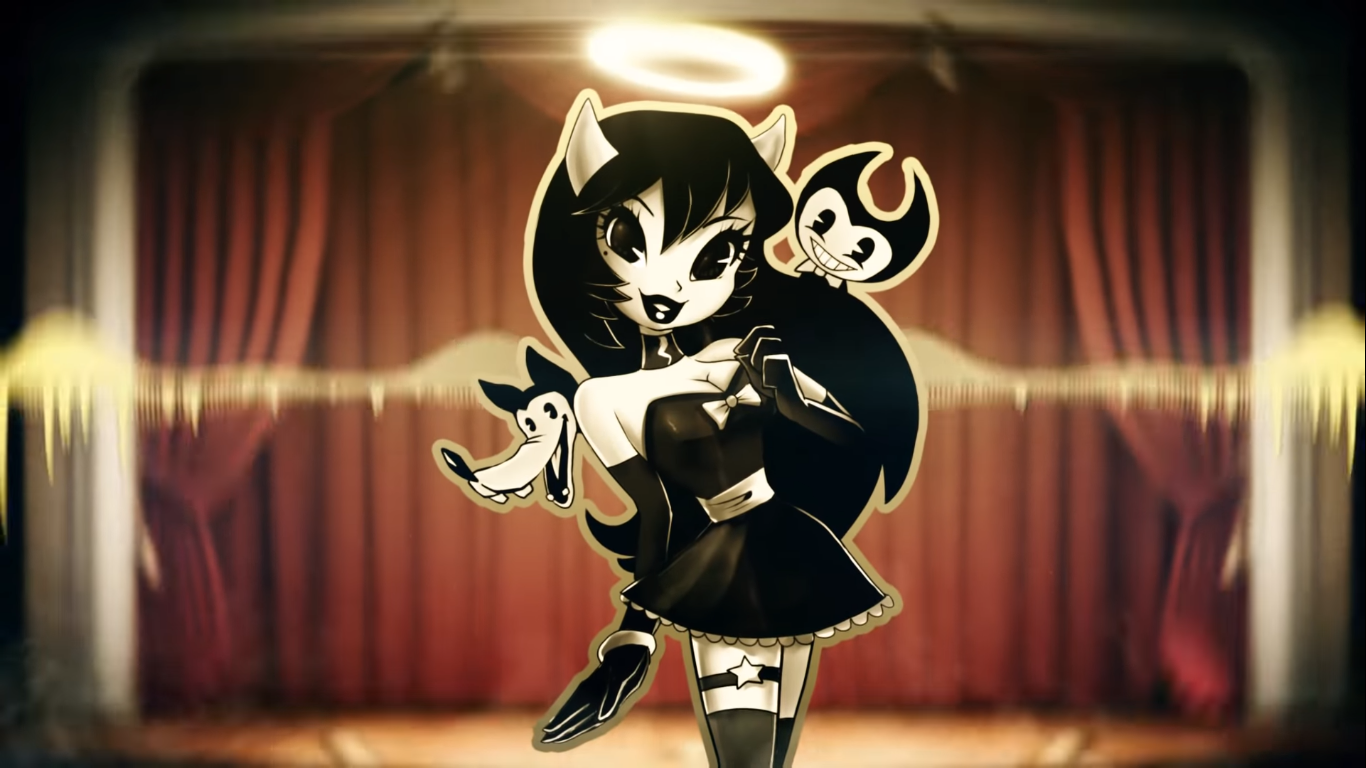

In [168]:
make_image(alice_image)

In [382]:
gauss_img = apply_conv(alice_image, gauss_matrix(5,9))

paddings: 4 4


In [383]:
box_image = apply_conv(alice_image, box_matrix(9))

paddings: 4 4


In [384]:
med_img = median_filter(alice_image, 9)

paddings: 4 4


In [374]:
sobel_image = contour_filter(alice_image, 'sobel', multichennel=True)

In [377]:
previtt = contour_filter(alice_image, 'previtt', multichennel=True)

In [378]:
roberts = contour_filter(alice_image, 'roberts', multichennel=True)

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


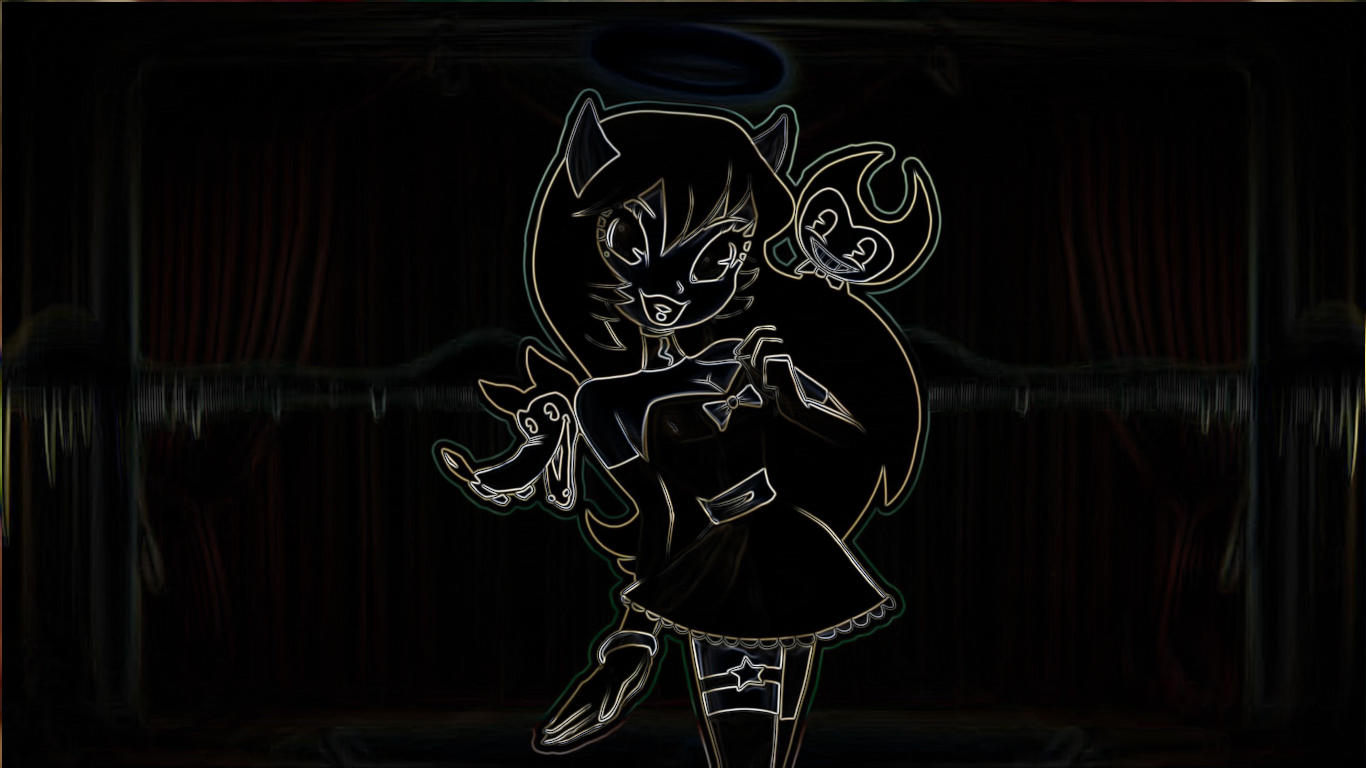

In [375]:
make_image(sobel_image)

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


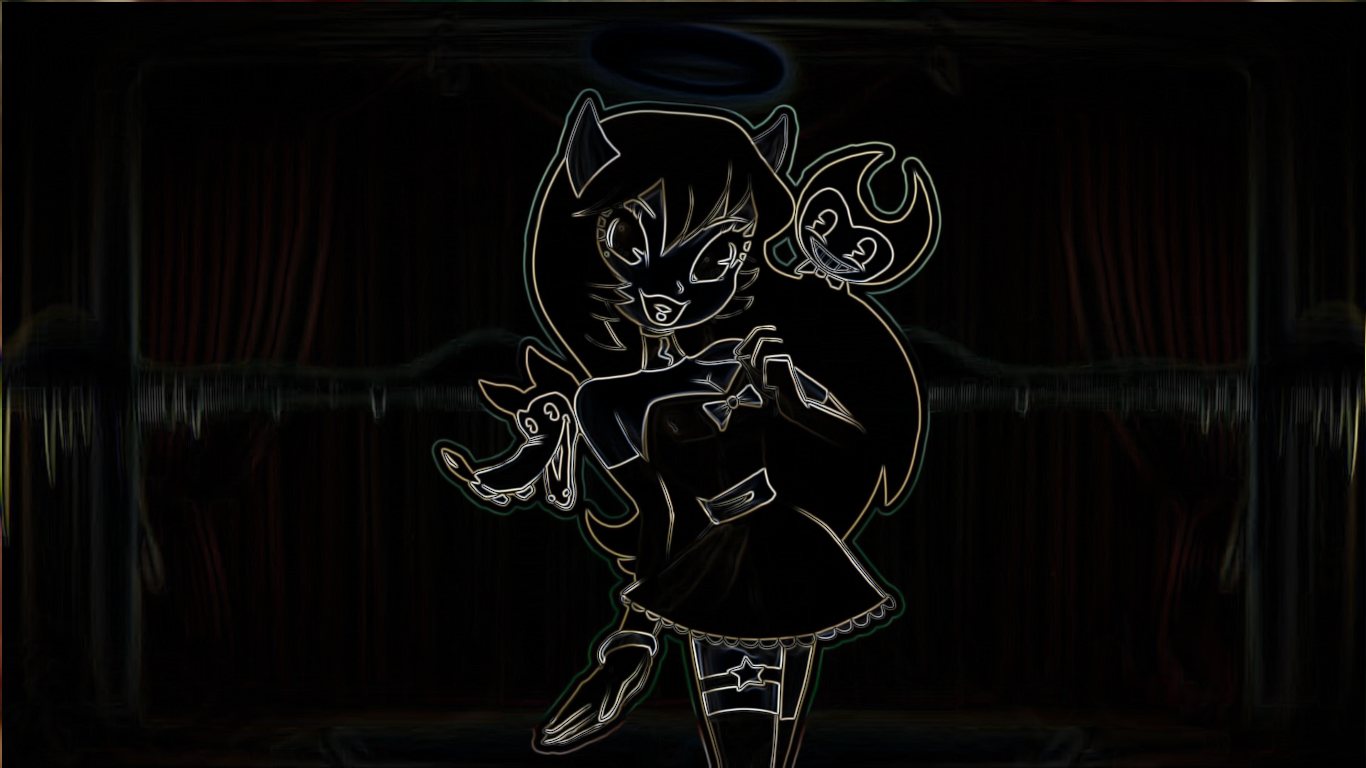

In [379]:
make_image(previtt)

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


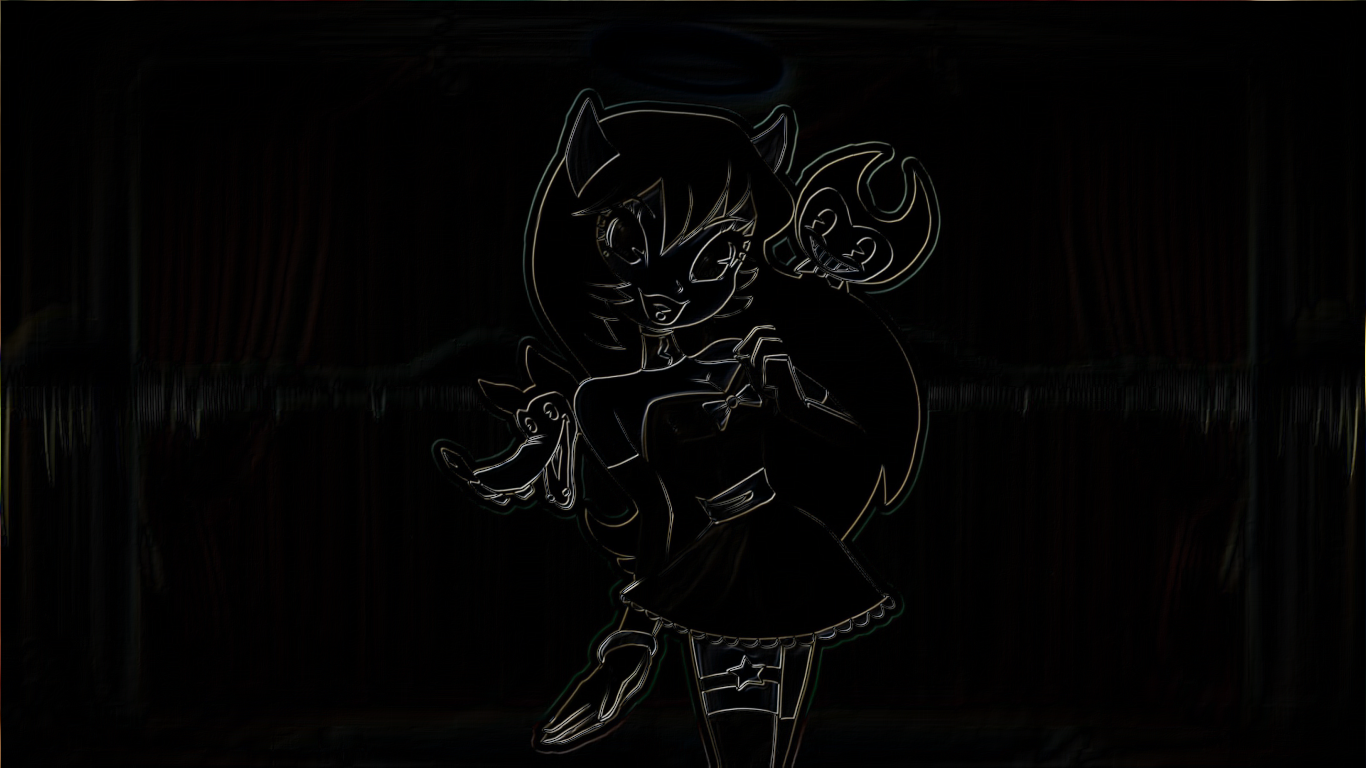

In [380]:
make_image(roberts)

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


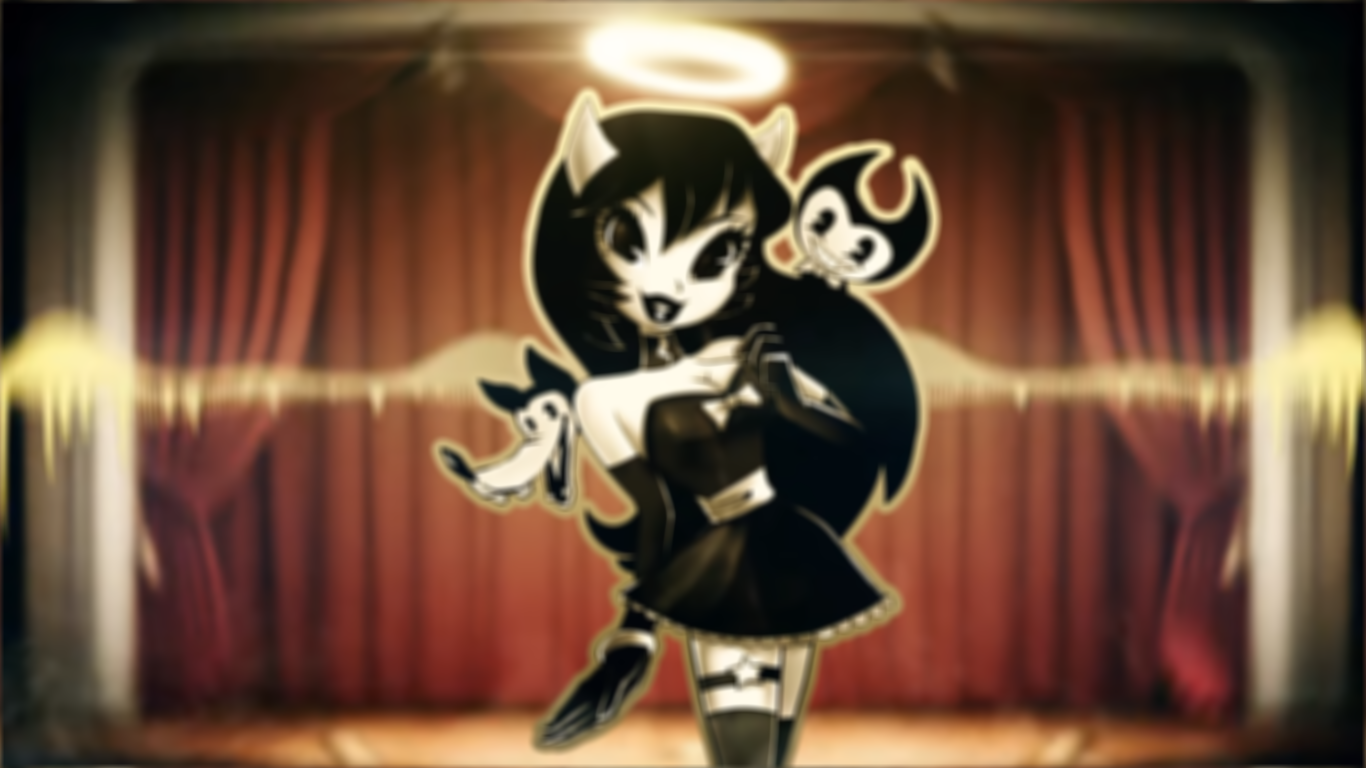

In [385]:
make_image(gauss_img)

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


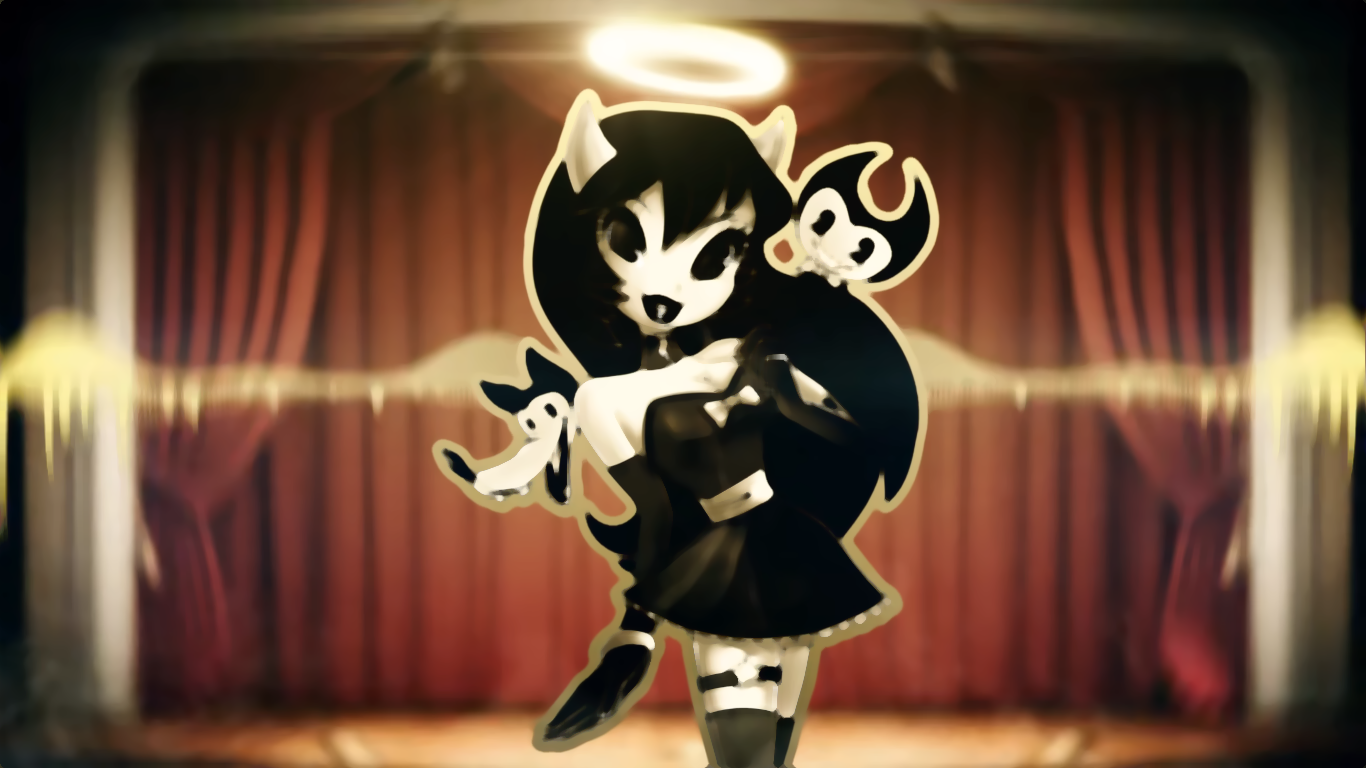

In [386]:
make_image(med_img)

D:\Programms\Anaconda\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


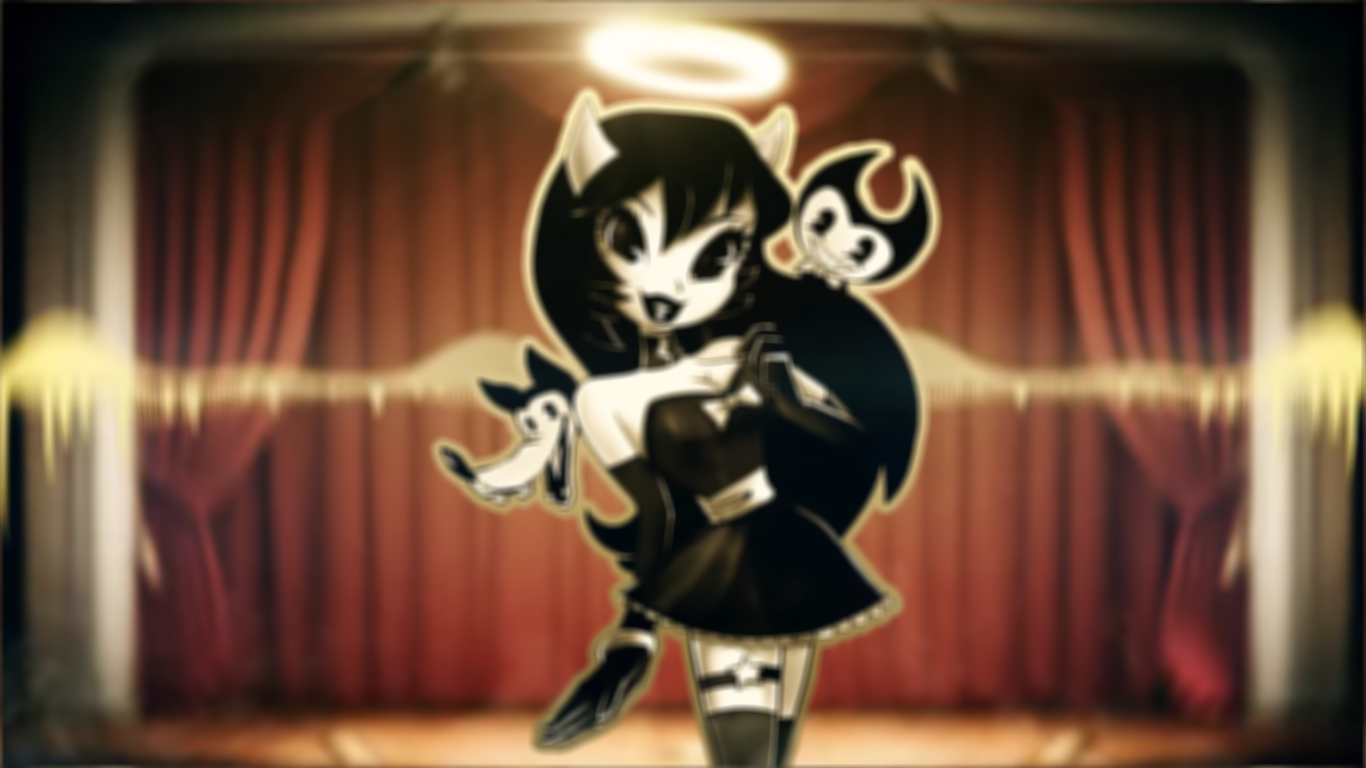

In [387]:
make_image(box_image)